<a href="https://colab.research.google.com/github/mjcho1/practice_python/blob/master/Melon_Crawling_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
 
f = open("crawl_data.txt", 'w', -1, "utf-8")        # utf-8 속성이 있어야 파일 쓸 때 인코딩 에러 x
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}    # 멜론 사이트는 헤더 값이 있어야 함
url = 'https://www.melon.com/chart/index.htm'
 
code = requests.get(url, headers = header).text     # 크롤링할 페이지의 모든 태그를 가져옴
soup = BeautifulSoup(code,'html.parser')            # html 파일을 가져옴
title = soup.find_all("div", {"class":"ellipsis rank01"})       # 노래 제목의 정보는 div 태그의 ellipsis rank01클래스 안에 있음
                                                                # find_all함수는 해당 조건에 맞는 모든 태그를 가져옴
singer = soup.find_all("div", {"class":"ellipsis rank02"})      # 가수의 정보는 div 태그의 ellipsis rank02클래스 안에 있음
 
real_title = []
real_singer = []

for i in title:
    real_title.append(i.find('a').text)         # html 태그에서 노래 제목만(a 태그의 텍스트 값)
                                                # find함수는 해당 조건에 맞는 하나의 태그만 가져옴. 중복이면 가장 첫 번째 태그
 
for j in singer:
    real_singer.append(j.find('a').text)        # html 태그에서 가수만(a 태그의 텍스트 값)
 
for k in range(1,51):   # 차트 순위가 1위~50위
    f.write("{}.{} - {}\n".format(k, real_title[k], real_singer[k]))   # '1(순위).노래제목 -가수'의 형태로 데이터를 저장
 
f.close()

In [ ]:
!ls

crawl_data.txt	melon100.csv  sample_data


In [ ]:
!cat crawl_data.txt

1.시작 - 가호 (Gaho)
2.00:00 (Zero O’Clock) - 방탄소년단
3.Black Swan - 방탄소년단
4.친구 - 방탄소년단
5.Filter - 방탄소년단
6.Moon - 방탄소년단
7.시차 - 방탄소년단
8.작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey) - 방탄소년단
9.Inner Child - 방탄소년단
10.We are Bulletproof : the Eternal - 방탄소년단
11.Louder than bombs - 방탄소년단
12.욱 (UGH!) - 방탄소년단
13.아무노래 - 지코 (ZICO)
14.Interlude : Shadow - 방탄소년단
15.Respect - 방탄소년단
16.Outro : Ego - 방탄소년단
17.마음을 드려요 - 아이유
18.영웅 (英雄; Kick It) - NCT 127
19.FIESTA - IZ*ONE (아이즈원)
20.WANNABE - ITZY (있지)
21.METEOR - 창모 (CHANGMO)
22.문득 - 노을
23.어떻게 지내 - 오반
24.그때 그 아인 - 김필
25.Elevator (127F) - NCT 127
26.돌덩이 - 하현우 (국카스텐)
27.꿈 (Boom) - NCT 127
28.낮잠 (Pandora's Box) - NCT 127
29.반만 - 진민호
30.우산 (Love Song) - NCT 127
31.Day Dream (白日夢) - NCT 127
32.메아리 (Love Me Now) - NCT 127
33.늦은 밤 너의 집 앞 골목길에서 - 노을
34.Interlude: Neo Zone - NCT 127
35.Blueming - 아이유
36.Psycho - Red Velvet (레드벨벳)
37.백야 (White Night) - NCT 127
38.Sit Down! - NCT 127
39.뿔 (MAD DOG) - NCT 127
40.Not Alone - NCT 127
41.Dreams Come True - NCT 127
42.너를 사랑하고

In [ ]:
import urllib.request
from bs4 import BeautifulSoup
import csv

hdr = {'User-Agent' : 'Mozilla/5.0'}
url = 'https://www.melon.com/chart/index.htm'

req = urllib.request.Request(url, headers = hdr)
html = urllib.request.urlopen(req).read()
soup = BeautifulSoup(html, 'html.parser')

lst50 = soup.select('.lst50, .lst100')

melonList = []
for i in lst50:
  temp = []
  temp.append(i.select_one('.rank').text)
  temp.append(i.select_one('.ellipsis.rank01').a.text)
  temp.append(i.select_one('.ellipsis.rank02').a.text)
  temp.append(i.select_one('.ellipsis.rank03').a.text)
  melonList.append(temp)

# print(melonList[0])
with open('melon100.csv', 'w', encoding = 'utf-8', newline = '') as f:
  writer = csv.writer(f)
  writer.writerow(['순위', '곡명', '아티스트', '앨범'])
  writer.writerows(melonList)

In [ ]:
!ls

crawl_data.txt	melon100.csv  sample_data


In [ ]:
import pandas as pd

# melon100 데이터 로드
melon100_df = pd.read_csv('melon100.csv')
melon100_df

,순위,곡명,아티스트,앨범
0,1,ON,방탄소년단,MAP OF THE SOUL : 7
1,2,시작,가호 (Gaho),이태원 클라쓰 OST Part.2
2,3,00:00 (Zero O’Clock),방탄소년단,MAP OF THE SOUL : 7
3,4,Black Swan,방탄소년단,MAP OF THE SOUL : 7
4,5,친구,방탄소년단,MAP OF THE SOUL : 7
...,...,...,...,...
95,96,새 사랑,송하예,새 사랑
96,97,기억해줘요 내 모든 날과 그때를,거미,호텔 델루나 OST Part.7
97,98,Howling,VICTON (빅톤),Continuous
98,99,comethru,Jeremy Zucker,"summer,"


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [ ]:
# 마이너스 폰트가 깨지는 문제를 대처
plt.rc("axes", unicode_minus=False)

In [ ]:
## 데이터 미리보기
# shape : 행, 열 정보를 알 수 있음
melon100_df.shape

(100, 4)

In [ ]:
# head() : 앞에서부터 5개 데이터를 기본값으로 볼 수 있음
melon100_df.head()

,순위,곡명,아티스트,앨범
0,1,ON,방탄소년단,MAP OF THE SOUL : 7
1,2,시작,가호 (Gaho),이태원 클라쓰 OST Part.2
2,3,00:00 (Zero O’Clock),방탄소년단,MAP OF THE SOUL : 7
3,4,Black Swan,방탄소년단,MAP OF THE SOUL : 7
4,5,친구,방탄소년단,MAP OF THE SOUL : 7


In [ ]:
# tail() : 뒤에서부터 5개 데이터를 볼 수 있음
melon100_df.tail()

,순위,곡명,아티스트,앨범
95,96,새 사랑,송하예,새 사랑
96,97,기억해줘요 내 모든 날과 그때를,거미,호텔 델루나 OST Part.7
97,98,Howling,VICTON (빅톤),Continuous
98,99,comethru,Jeremy Zucker,"summer,"
99,100,Say,윤미래,이태원 클라쓰 OST Part.8


In [ ]:
# 데이터 요약하기
# int64 : 정수형, object : 문자열, float : 소수점이 들어간 숫자 
melon100_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
순위      100 non-null int64
곡명      100 non-null object
아티스트    100 non-null object
앨범      100 non-null object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


In [ ]:
# 컬럼명 보기
melon100_df.columns

Index(['순위', '곡명', '아티스트', '앨범'], dtype='object')

In [ ]:
# 데이터 타입 확인하기
melon100_df.dtypes

순위       int64
곡명      object
아티스트    object
앨범      object
dtype: object

In [ ]:
# 결측치 확인
# isnull() : 해당 데이터가 결측치라면 True 출력
# sum() : True 의 개수를 세줌
null_count = melon100_df.isnull().sum()
null_count

순위      0
곡명      0
아티스트    0
앨범      0
dtype: int64

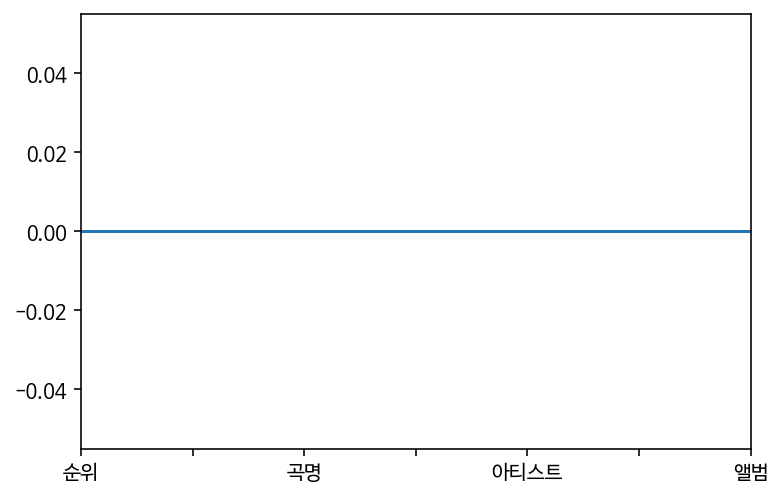

In [ ]:
# 결측치 시각화하기
null_count.plot()
#null_count.plot.bar()
#null_count.plot.bar(rot=60)
#null_count.plot.barh(figsize=(5,7))

In [ ]:
# 결측치 데이터 프레임 형태로 변형하기 : reset_index() 이용
df_null_count = null_count.reset_index()
df_null_count

,index,0
0,순위,0
1,곡명,0
2,아티스트,0
3,앨범,0


In [ ]:
# 새로운 컬럼명 지정하기
df_null_count.columns = ['컬럼명', '결측치수']
df_null_count

,컬럼명,결측치수
0,순위,0
1,곡명,0
2,아티스트,0
3,앨범,0


In [ ]:
# 결측치를 기준으로 내림차순 정렬
# by : 기준이 되는 컬럼 설정
# ascending : 오름차순, 내림차순 정렬을 지정
df_null_count_top = df_null_count.sort_values(by = "결측치수", ascending = False).head()
df_null_count_top

,컬럼명,결측치수
0,순위,0
1,곡명,0
2,아티스트,0
3,앨범,0


In [ ]:
# 특정 컬럼만 불러오기
melon100_df["곡명"].head()

0                      ON
1                      시작
2    00:00 (Zero O’Clock)
3              Black Swan
4                      친구
Name: 곡명, dtype: object

In [ ]:
# 컬럼명 리스트화 하기
one_columns = df_null_count_top["컬럼명"].tolist()
one_columns

['순위', '곡명', '아티스트', '앨범']

In [ ]:
# 삭제할 컬럼 확인 (결측치 있는 경우)
melon100_df[one_columns].head()

,순위,곡명,아티스트,앨범
0,1,ON,방탄소년단,MAP OF THE SOUL : 7
1,2,시작,가호 (Gaho),이태원 클라쓰 OST Part.2
2,3,00:00 (Zero O’Clock),방탄소년단,MAP OF THE SOUL : 7
3,4,Black Swan,방탄소년단,MAP OF THE SOUL : 7
4,5,친구,방탄소년단,MAP OF THE SOUL : 7


In [ ]:
# 결측치 top drop
# melon100_df = melon100_df(one_columns, axis=1)

In [ ]:
## 기술통계값
# dtypes : 데이터 타입 출력
melon100_df["순위"].dtypes

dtype('int64')

In [ ]:
# 평균값
melon100_df["순위"].mean()

50.5

In [ ]:
# 중앙값
melon100_df["순위"].median()

50.5

In [ ]:
# 최대값
melon100_df["순위"].max()

100

In [ ]:
# 최소값
melon100_df["순위"].min()

1

In [ ]:
# 데이터의 개수 확인하기
melon100_df["순위"].count()

100

In [ ]:
# 요약값 확인하기
# 25% : 앞에서 1/4 되는 값, 1사분위수
# 50% : 중앙값, 2사분위수
# 75% : 앞에서 3/4 번째 되는 수, 3사분위수
# mean, min, max 는 각각 평균, 최소값, 최대값
melon100_df["순위"].describe()

# 2개 이상일 경우 list 형태로 컬럼을 넣어야 함
#melon100_df[["순위1", "순위2"]].describe()

count    100.000000
mean      50.500000
std       29.011492
min        1.000000
25%       25.750000
50%       50.500000
75%       75.250000
max      100.000000
Name: 순위, dtype: float64

In [ ]:
# 특정 데이터만 요약하기
# number : 숫자로 된 데이터만 요약
melon100_df.describe(include="number")

,순위
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


In [ ]:
# object : 문자열 데이터만 요약
# top : 가장 높은 빈도로 저장된 데이터
# freq : top 데이터의 빈도수 표시
melon100_df.describe(include="object")

,곡명,아티스트,앨범
count,100,100,100
unique,100,56,73
top,기억해줘요 내 모든 날과 그때를,방탄소년단,MAP OF THE SOUL : 7
freq,1,16,14


In [ ]:
# all : 모든 데이터 요약
# unique : 값의 종류가 몇 개인지 표시
melon100_df.describe(include="all")

,순위,곡명,아티스트,앨범
count,100.000000,100,100,100
unique,NaN,100,56,73
top,NaN,기억해줘요 내 모든 날과 그때를,방탄소년단,MAP OF THE SOUL : 7
freq,NaN,1,16,14
mean,50.500000,NaN,NaN,NaN
std,29.011492,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,25.750000,NaN,NaN,NaN
50%,50.500000,NaN,NaN,NaN
75%,75.250000,NaN,NaN,NaN


In [ ]:
# unique : 값의 종류 표시
melon100_df["아티스트"].unique()

array(['방탄소년단', '가호 (Gaho)', '지코 (ZICO)', '아이유', 'NCT 127',
       'IZ*ONE (아이즈원)', 'ITZY (있지)', '창모 (CHANGMO)', '노을', '오반', '김필',
       '하현우 (국카스텐)', '진민호', 'Red Velvet (레드벨벳)', '백현 (BAEKHYUN)', '백예린',
       '장범준', '마마무 (Mamamoo)', 'Crush', '마크툽 (MAKTUB)', 'AKMU (악동뮤지션)',
       '김재환', 'Anne-Marie', '신예영', '전상근', '염따', '임재현', '폴킴', 'HYNN (박혜원)',
       'V.O.S', '이예준', 'Ruel', 'EXO', '씨야', '찬열 (CHANYEOL)', 'KCM', '이우',
       'Billie Eilish', 'Lauv', '황인욱', '먼데이 키즈 (Monday Kiz)',
       'Conan Gray', 'Arizona Zervas', '송가인', '윤미래', '다비치', '백지영', '잔나비',
       '장덕철', 'Shawn Mendes', '코드 쿤스트 (CODE KUNST)', '김나영', '송하예', '거미',
       'VICTON (빅톤)', 'Jeremy Zucker'], dtype=object)

In [ ]:
# nunique : 값의 종류가 몇 개인지 표시
melon100_df["아티스트"].nunique()

56

In [ ]:
# 그룹화된 요약값 보기
# value_counts : 각 value 가 몇 개인지를 세어줌
melon100_df["아티스트"].value_counts()

방탄소년단                  16
NCT 127                13
아이유                     3
폴킴                      3
창모 (CHANGMO)            3
백현 (BAEKHYUN)           2
노을                      2
윤미래                     2
황인욱                     2
송하예                     2
Anne-Marie              2
전상근                     2
V.O.S                   2
임재현                     2
마크툽 (MAKTUB)            2
백예린                     2
다비치                     1
하현우 (국카스텐)              1
EXO                     1
잔나비                     1
진민호                     1
마마무 (Mamamoo)           1
장덕철                     1
Arizona Zervas          1
신예영                     1
KCM                     1
Crush                   1
장범준                     1
찬열 (CHANYEOL)           1
VICTON (빅톤)             1
Conan Gray              1
IZ*ONE (아이즈원)           1
가호 (Gaho)               1
지코 (ZICO)               1
염따                      1
AKMU (악동뮤지션)            1
김나영                     1
백지영                     1
코드 쿤스트 (CODE

In [ ]:
# normalize 옵션 : 전체에서 차지하는 비율을 계산해줌
melon100_df["아티스트"].value_counts(normalize=True)

방탄소년단                  0.16
NCT 127                0.13
아이유                    0.03
폴킴                     0.03
창모 (CHANGMO)           0.03
백현 (BAEKHYUN)          0.02
노을                     0.02
윤미래                    0.02
황인욱                    0.02
송하예                    0.02
Anne-Marie             0.02
전상근                    0.02
V.O.S                  0.02
임재현                    0.02
마크툽 (MAKTUB)           0.02
백예린                    0.02
다비치                    0.01
하현우 (국카스텐)             0.01
EXO                    0.01
잔나비                    0.01
진민호                    0.01
마마무 (Mamamoo)          0.01
장덕철                    0.01
Arizona Zervas         0.01
신예영                    0.01
KCM                    0.01
Crush                  0.01
장범준                    0.01
찬열 (CHANYEOL)          0.01
VICTON (빅톤)            0.01
Conan Gray             0.01
IZ*ONE (아이즈원)          0.01
가호 (Gaho)              0.01
지코 (ZICO)              0.01
염따                     0.01
AKMU (악동뮤지션)        

In [ ]:
# top 15 개 추출
artist_top_15 = melon100_df["아티스트"].value_counts().head(15)
print(artist_top_15)

방탄소년단            16
NCT 127          13
아이유               3
폴킴                3
창모 (CHANGMO)      3
백현 (BAEKHYUN)     2
노을                2
윤미래               2
황인욱               2
송하예               2
Anne-Marie        2
전상근               2
V.O.S             2
임재현               2
마크툽 (MAKTUB)      2
Name: 아티스트, dtype: int64


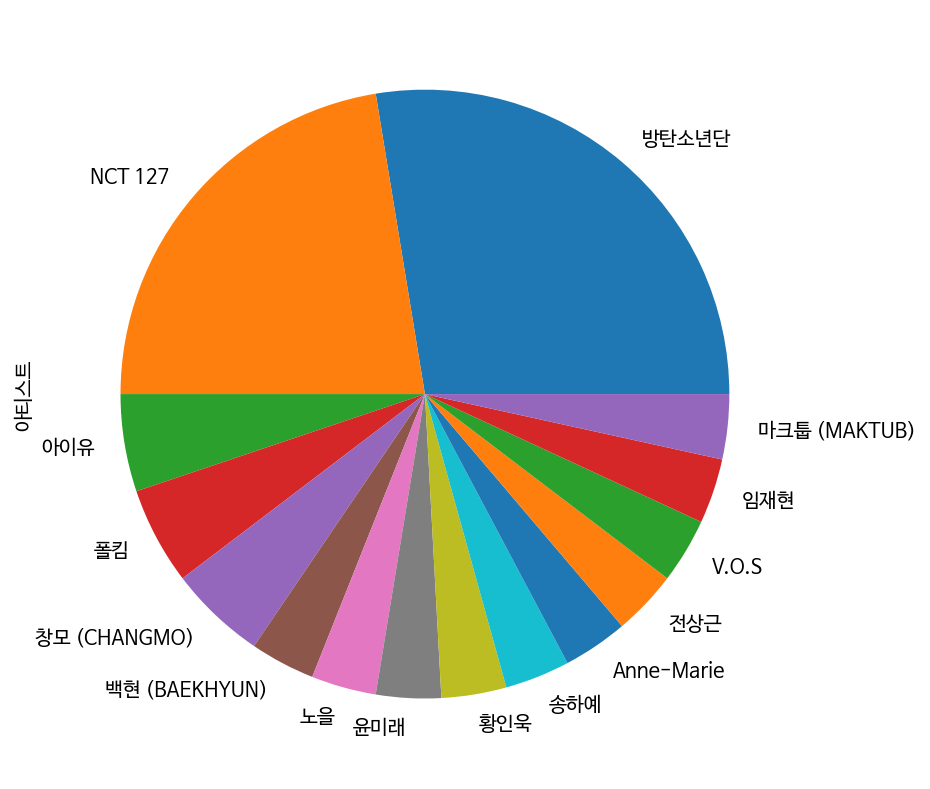

In [ ]:
artist_top_15.plot.pie(figsize=(7,7))

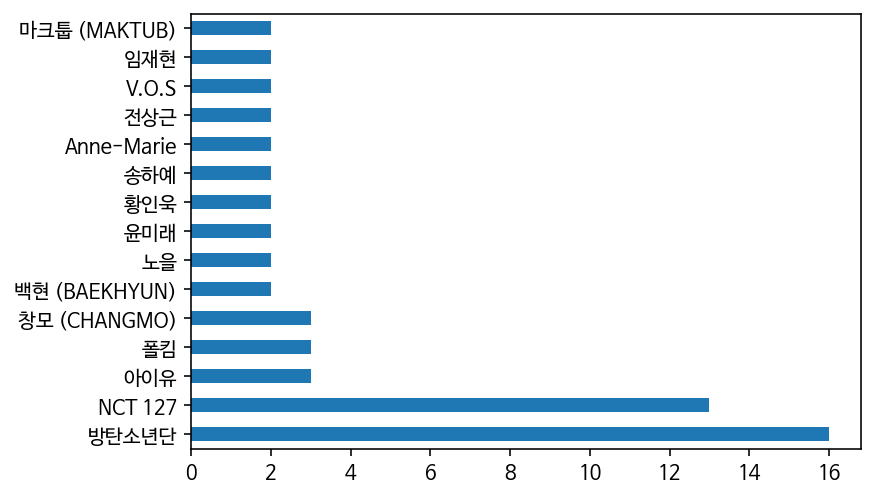

In [ ]:
artist_top_15.plot.barh()

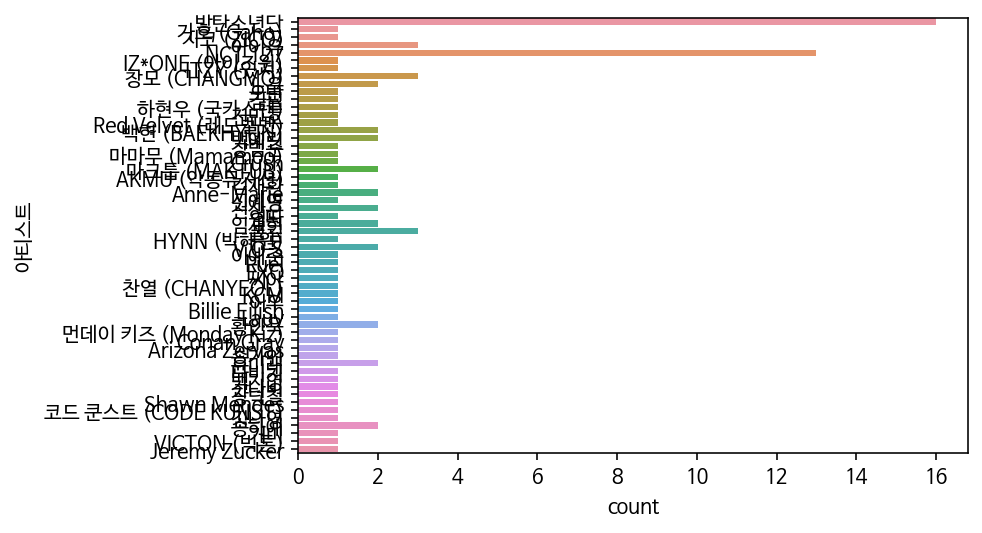

In [ ]:
## 데이터 요약하기 : seaborn 으로 빈도수 시각화하기
import seaborn as sns

sns.countplot(data = melon100_df, y = "아티스트")

방탄소년단            16
NCT 127          13
아이유               3
폴킴                3
창모 (CHANGMO)      3
백현 (BAEKHYUN)     2
노을                2
윤미래               2
황인욱               2
송하예               2
Anne-Marie        2
전상근               2
V.O.S             2
임재현               2
마크툽 (MAKTUB)      2
Name: 아티스트, dtype: int64


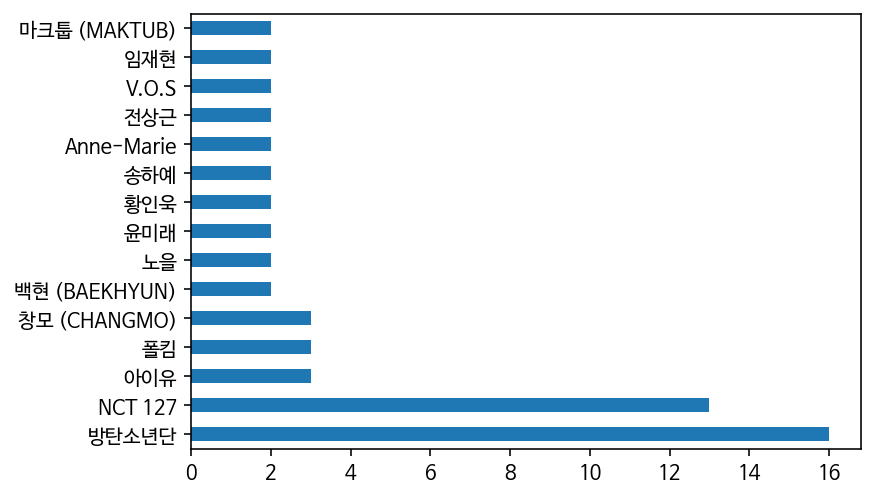

In [ ]:
c = melon100_df["아티스트"].value_counts().head(15)
print(c)
c.plot.barh()

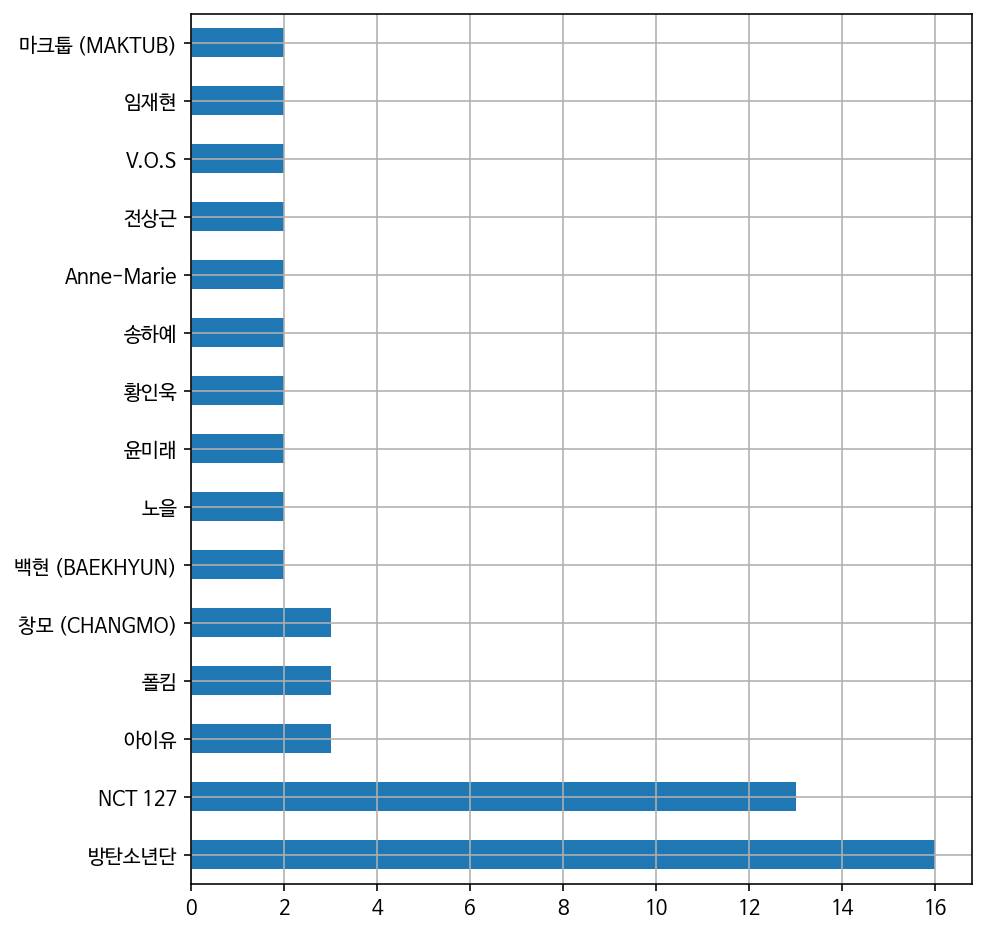

In [ ]:
c.plot.barh(figsize=(7,8), grid=True)

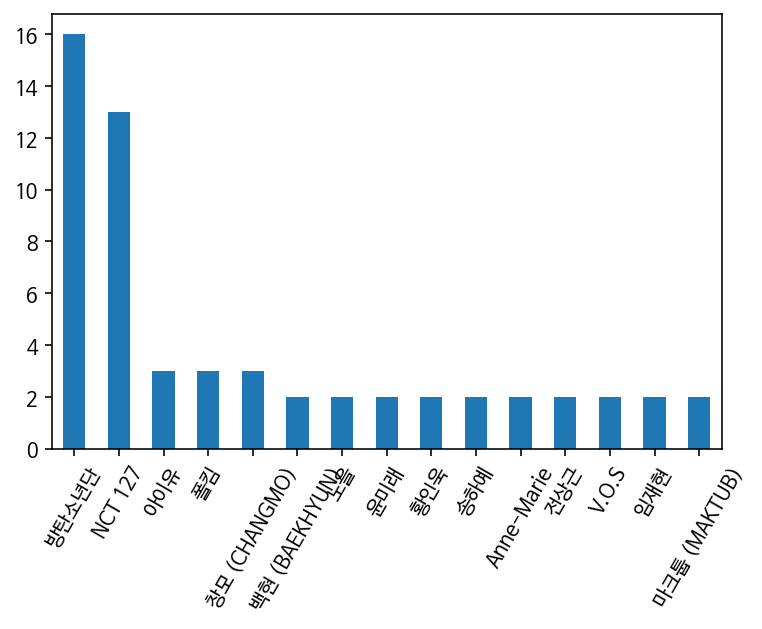

In [ ]:
c.plot.bar(rot=60)

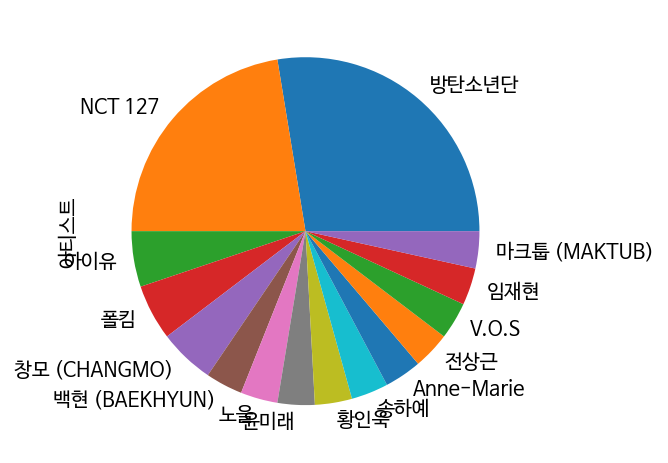

In [ ]:
c.plot.pie()